In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DS9.csv")

X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [24]:
def batch_gradient_descent(X, y, lr=0.01, epochs=500):
    m, n = X.shape
    w = np.zeros(n)
    losses = []

    for _ in range(epochs):
        y_hat = X @ w
        error = y_hat - y
        gradient = (1/m) * X.T @ error
        w -= lr * gradient
        losses.append(np.mean(error**2))

    return w, losses


In [25]:
def mini_batch_sgd(X, y, lr=0.01, epochs=500, batch_size=32):
    m, n = X.shape
    w = np.zeros(n)
    losses = []

    for _ in range(epochs):
        indices = np.random.permutation(m)
        for i in range(0, m, batch_size):
            batch_idx = indices[i:i+batch_size]
            Xb, yb = X[batch_idx], y[batch_idx]
            error = Xb @ w - yb
            gradient = (1/len(Xb)) * Xb.T @ error
            w -= lr * gradient

        losses.append(np.mean((X @ w - y)**2))

    return w, losses


In [26]:
w_batch, loss_batch = batch_gradient_descent(X_train, y_train)
w_sgd, loss_sgd = mini_batch_sgd(X_train, y_train)


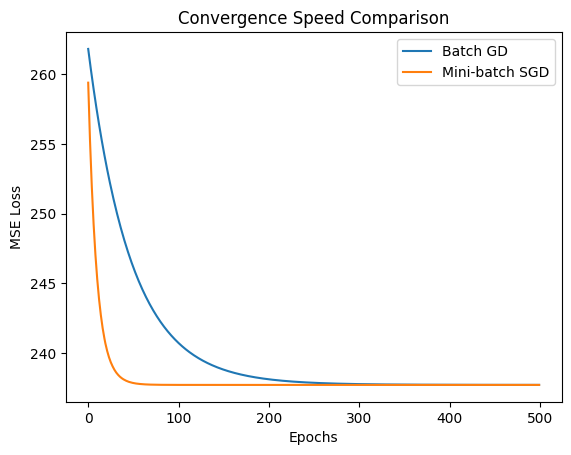

In [27]:
plt.plot(loss_batch, label='Batch GD')
plt.plot(loss_sgd, label='Mini-batch SGD')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence Speed Comparison")
plt.legend()
plt.show()


In [11]:
# Mini batch SGD converges faster initially and is computationally more efficient per epoch than batch GD